# Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from unidecode import unidecode
import matplotlib.pyplot as plt

# Fetch the offers to jobmarket

In [2]:
# Request data from API
user = "hacomar@fulp.es"
clave = "Atenas.2023"
base_url = "https://www.jobmarketinsights.com/jmi-api/"
login_url = base_url + "token"

# Log into API

In [3]:
def login():
    # Define the headers to set the Content-Type
    headers = {'Content-Type': 'application/json'}
    # Create a dictionary containing the data to send as JSON
    payload = {'email': user, 'password': clave}
    # Convert the payload to JSON format
    json_payload = json.dumps(payload)
    # Send the POST request with the specified headers and JSON data
    r = requests.post(login_url, data=json_payload, headers=headers)
    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        # Parse the JSON response
        data = r.json()
        token = data["auth"]["token"]
        return token
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
token = login()
print(token)

VGWL3WQ4JB4HGZD7RE6KFXLMPUKHIM2HWEMRZ4M27JMRAQK2S76Q


# Scope

In [4]:
scope_url = base_url + "scopes"
def get_scope(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(scope_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_scope(token)
scopes = response["scopes"][0]["key"]
print(scopes)

792


# Periods

In [5]:
# Ask for list with able periods
periods_url = base_url + "periods"
def get_periods(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(periods_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['periods']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# Returns an array of dicts with 4 keys: from, label, to, key
periods = get_periods(token)
print(periods)
# For example, we will use the first period
period = periods[10]
initial_date = period['from']
end_date = period['to']

[{'from': '2023-10-12', 'label': 'Últimos días', 'to': '2023-10-16', 'key': 'ld'}, {'from': '2023-09-01', 'label': 'sep 2023', 'to': '2023-10-01', 'key': '2023-09'}, {'from': '2023-08-01', 'label': 'ago 2023', 'to': '2023-09-01', 'key': '2023-08'}, {'from': '2023-07-01', 'label': 'jul 2023', 'to': '2023-08-01', 'key': '2023-07'}, {'from': '2023-06-01', 'label': 'jun 2023', 'to': '2023-07-01', 'key': '2023-06'}, {'from': '2023-05-01', 'label': 'may 2023', 'to': '2023-06-01', 'key': '2023-05'}, {'from': '2023-04-01', 'label': 'abr 2023', 'to': '2023-05-01', 'key': '2023-04'}, {'from': '2023-03-01', 'label': 'mar 2023', 'to': '2023-04-01', 'key': '2023-03'}, {'from': '2023-02-01', 'label': 'feb 2023', 'to': '2023-03-01', 'key': '2023-02'}, {'from': '2023-01-01', 'label': 'ene 2023', 'to': '2023-02-01', 'key': '2023-01'}, {'from': '2022-12-01', 'label': 'dic 2022', 'to': '2023-01-01', 'key': '2022-12'}, {'from': '2022-11-01', 'label': 'nov 2022', 'to': '2022-12-01', 'key': '2022-11'}, {'fr

# Missing advertisers

In [6]:
missing_adverts_url = base_url + "missingAdvertisers"

def create_payload(token, initial_date, end_date, size=100, offset=0):
    payload = {'strictPeriod': True, 'location': 'ES', 'token': token,"period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "offset": offset}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    return json_payload, headers

def get_missing_adverts(token, scope, initial_date, end_date, size=100, offset=0):
    payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
    json_payload = json.dumps(payload)
    r = requests.post(missing_adverts_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# print(get_missing_adverts(token, scopes, initial_date, end_date))

# Reports

In [7]:
# reports_url = base_url + "report"
# def get_reports(token, scope, primaryField, initial_date="2020-01-01", final_date="2020-12-31", size=100, offset=0):
#     json_payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
#     primary_field = {"primaryField" : primaryField}
#     # Add the primaryField to the payload
#     payload = json.loads(json_payload)
#     payload.update(primary_field)
#     json_payload = json.dumps(payload)
#     r = requests.post(reports_url, data=json_payload, headers=headers)
#     if r.status_code == 200:
#         data = r.json()
#         return data
#     else:
#         print(f"Request failed with status code {r.status_code}")
#         return None
# response = get_reports(token, scopes, "location", initial_date, end_date)
# print(response)

# Sites

In [8]:
sites_url = base_url + "sites"
def get_sites(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(sites_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_sites(token)
print(response)

{'total': {'offers': 263256, 'companies': 50982}, 'auth': {'token': 'VGWL3WQ4JB4HGZD7RE6KFXLMPUKHIM2HWEMRZ4M27JMRAQK2S76Q'}, 'sites': [{'offers': 80875, 'companies': 17122, 'label': 'infojobs.net', 'key': '1963'}, {'offers': 40338, 'companies': 3875, 'label': 'es.talent.com', 'key': '4142'}, {'offers': 39185, 'companies': 13518, 'label': 'linkedin.com', 'key': '3455'}, {'offers': 37980, 'companies': 7484, 'label': 'indeed', 'key': '3427'}, {'offers': 20727, 'companies': 9269, 'label': 'jobtoday.com', 'key': '4023'}, {'offers': 14223, 'companies': 5505, 'label': 'glassdoor.com', 'key': '3933'}, {'offers': 11233, 'companies': 1030, 'label': 'empleate.gob.es', 'key': '4058'}, {'offers': 11148, 'companies': 472, 'label': 'iberempleos.es', 'key': '4254'}, {'offers': 10986, 'companies': 380, 'label': 'epreselec.com', 'key': '4186'}, {'offers': 5909, 'companies': 1191, 'label': 'monster.es', 'key': '3464'}, {'offers': 5175, 'companies': 353, 'label': 'infoempleo.com', 'key': '3451'}, {'offers

# Offers

In [9]:
offers_url = base_url + "offers"
def get_offers(token, initial_date, end_date, size=100, offset=0, site=None):
    json_payload, headers = create_payload(token, initial_date, end_date, size, offset)
    # Add the site to the payload
    site = {"site" : "1963"}
    payload = json.loads(json_payload)
    payload.update(site)
    json_payload = json.dumps(payload)
    print(json_payload)
    r = requests.post(offers_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
initial_date = '2023-10-09'
end_date = '2023-10-12'
response = get_offers(token, initial_date, end_date, size=1, offset=1)
print(response[0])


{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPUKHIM2HWEMRZ4M27JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-09", "customDateTo": "2023-10-12", "offset": 1, "site": "1963"}
{'description': '¡Hola!¡Queremos conocerte!\n\n¿Te apasiona el mundo del comercio? ¿Te preocupas por los detalles? ¿Te consideras una persona dinámica? ¡Te estábamos esperando! \n\nCarrefour es una empresa líder en comercio de alimentación y distribución y queremos que inicies una carrera profesional llena de posibilidades con nuestros mejores profesionales. \n\nPretendemos que todos los días sean un aprendizaje, que crezcas y llegues tan lejos como quieras. Te ofrecemos formación a cargo de la empresa y la posibilidad de promocionar internamente para seguir creciendo con nosotros.\n\n¿Qué buscamos? \n\nCarrefour lo formamos un equipo de personas orientadas al Cliente, siempre con ganas de aprender e innovar en cuanto a la experiencia de compra en nuestras tiendas.\n\nPara

# Offers count

In [10]:
count_url = base_url + "count"
def get_count(token, initial_date, end_date):
    payload = {'token': token, "period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "location":"ES|53|GC"}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(count_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']['market']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
def get_all_offers(token, max_offers=1000):
    offers = []
    # for period in periods:
    initial_date = '2023-10-13'
    end_date = '2023-10-15'
    print(f"Period: {initial_date} - {end_date}")
    count = get_count(token, initial_date, end_date)
    print(f"Count: {count}")
    for index in range(0, count, 100):
        if count - index < 100:
            size = count - index
        else:
            size = 100
        response = get_offers(token, initial_date, end_date, size=size, offset=index)
        offers.extend(response)
        if len(offers) >= max_offers:
            return offers
    return offers
offers_news = get_all_offers(token, max_offers=1000)


Period: 2023-10-13 - 2023-10-15
Count: 160
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPUKHIM2HWEMRZ4M27JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-13", "customDateTo": "2023-10-15", "offset": 0, "site": "1963"}
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPUKHIM2HWEMRZ4M27JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-13", "customDateTo": "2023-10-15", "offset": 100, "site": "1963"}


In [11]:
def format_offer(offer):
    expected_keys = ['title', 'description', 'company', 'location', 'category']
    expected_keys_post = ['date', 'site', 'id', 'url']
    expected_keys_labeled = ['category', 'site', 'location']
    formated_offer = {}
    for key in expected_keys:
        if key not in offer:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = offer[key]['label']
            else:
                formated_offer[key] = offer[key]
    post = get_last_record(offer['postings'])
    for key in expected_keys_post:
        if key not in post:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = post[key]['label']
            else:
                formated_offer[key] = post[key]
    return formated_offer

def get_last_record(postings):
    dates = []
    for post in postings:
        dates.append(post['date'])
    # Get index of the last date
    index = dates.index(max(dates))
    return postings[index]

def format_all_offers(offers):
    formated_offers = []
    for offer in offers:
        formated_offers.append(format_offer(offer))
    return formated_offers

formated_offers = format_all_offers(offers_news)

def set_id_oferta(offer):
    offer['id_oferta'] = offer['id']
    del offer['id']
    return offer

# Set the id_oferta for each offer
formated_offers = list(map(set_id_oferta, formated_offers))

with open("offers.txt",'w') as f:
    for offer in formated_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

# Read INFOJOBS_ESTUDIOS dataset

In [12]:
df = pd.read_json("INFOJOBS_ESTUDIOS.json")
# Clean df
df = df[df['nivel'] != "(Seleccionar)"]
expection_list = ["(Seleccionar)", "(regladas)", "(no regladas)", "Grado en", "PCEO", "Teoría de la", "\/", "Maestro: ", "\\"]
def format_denominacion(denominacion):
    for expection in expection_list:
        if expection in denominacion:
            denominacion = denominacion.replace(expection, "")
    return unidecode(denominacion).lower().strip()
df["nivel_formated"] = df["nivel"].apply(format_denominacion)
df["denominacion_formated"] = df["denominacion"].apply(format_denominacion)
# Read id_to_nivel.json
df_id = pd.read_json("id_to_nivel.json")
# Apply the format_denominacion function to the column 'nivel' of df_id
df_id['nivel_formated'] = df_id['nivel'].apply(format_denominacion)
mapping_id = dict(zip(df_id['nivel_formated'], df_id['id']))
mapping_id_raw = dict(zip(df_id['id'], df_id['nivel']))
# Create a dictionary to cast from 'denominacion_formated' to 'denominacion'
# mapping_denomination = dict(zip(df['denominacion_formated'], df['denominacion']))
# mapping_title = dict(zip(df['nivel_formated'], df['nivel']))
niveles_df = pd.read_json("niveles_estudio.json")
niveles_df['denominacion_formated'] = niveles_df['denominacion'].apply(format_denominacion)
# Cast from df to dict key: denominacion, value: nivel
niveles = {}
for denominacion, group in niveles_df.groupby('denominacion_formated'):
    niveles[denominacion] = int(group['id_nivel'].tolist()[0])
# Create a dictionary
titles = {}
for denominacion, group in df.groupby('denominacion_formated'):
    titles[denominacion] = group['nivel_formated'].tolist()

In [15]:
def read_property_correlations(file_path, correlations, option='niveles'):
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('->')
            property_name = parts[0]
            corresponding_parts = parts[1].split(',')
            # Check if the property already exists in correlations
            correlations[property_name] = []
            for corresponding_part in corresponding_parts:
                if option == 'niveles':
                    correlations[property_name].append(correlations[corresponding_part])
                elif option == 'titles':
                    correlations[property_name].extend(correlations[corresponding_part])
    return correlations

# Example usage:
file_path = './correlations.txt'
niveles = read_property_correlations(file_path, niveles, option='niveles')
titles = read_property_correlations(file_path, titles, option='titles')
print(titles['ingeniero en'])

['ingeniero de minas', 'geologo', 'ingeniero en organizacion industrial', 'ingeniero de materiales', 'ingeniero en informatica', 'arquitecto', 'ingeniero en geodesia y cartografia', 'ingeniero de caminos, canales y puertos', 'ingeniero en electronica', 'aeronautico', 'ingeniero en automatica y electronica industrial', 'agronomo', 'ingeniero de telecomunicacion', 'industrial', 'ingeniero de sistemas de defensa', 'quimico', 'ingeniero de montes', 'naval y oceanico', 'tecnico en diseno industrial', 'tecnico en informatica de gestion', 'tecnico en informatica de sistemas', 'tecnico en topografia', 'aeronautico', 'aeronautico, especialidad en aeromotores', 'aeronautico, especialidad en aeronavegacion', 'aeronautico, especialidad en aeronaves', 'aeronautico, especialidad en aeropuertos', 'aeronautico, especialidad en equipos y materiales aeroespaciales', 'agricola', 'agricola, especialidad en explotaciones agropecuarias', 'agricola, especialidad en hortofruticultura y jardineria', 'agricola,

# Custom niveles and titles

In [ ]:
# Add custom niveles
niveles['grado medio'] = niveles['ciclo formativo grado medio'] + niveles['formacion profesional grado medio']
niveles['grado superior'] = niveles['ciclo formativo grado superior'] + niveles['formacion profesional grado superior']
niveles['grado medio o superior'] = niveles['grado medio'] + niveles['grado superior']
niveles['licenciado'] = niveles['licenciatura']
niveles['diplomado'] = niveles['diplomatura']
niveles['phd'] = niveles['doctorado']
niveles['eso'] = niveles['educacion secundaria obligatoria']
niveles['fp'] = niveles['formacion profesional grado medio'] + niveles['formacion profesional grado superior']
niveles['grau'] = niveles['grado'] # Grado en italiano
niveles['bachelor'] = niveles['grado'] # Grado en inglés
niveles['formacion profesional'] = niveles['formacion profesional grado medio'] + niveles['formacion profesional grado superior']
niveles['degree'] = niveles['grado'] # Grado en inglés
niveles['titulacion universitaria'] = niveles['grado']
niveles['graduado'] = niveles['grado']
niveles['ciclo medio'] = niveles['ciclo formativo grado medio']
niveles['ciclo superior'] = niveles['ciclo formativo grado superior']
niveles['grado en'] = niveles['grado']
niveles['grado universitario'] = niveles['grado']
niveles['grado o'] = niveles['grado']
niveles['o grado'] = niveles['grado']
niveles['ingenieria en'] = niveles['ingenieria superior'] + niveles['ingenieria tecnica']
niveles['ingeniero en'] = niveles['ingenieria superior'] + niveles['ingenieria tecnica']
niveles['ingeniero de'] = niveles['ingenieria superior'] + niveles['ingenieria tecnica']
# del niveles['grado']
# TODO: "grado" es ambigua y hay que fijarse en el entorno de la palabra
# Remove duplicated values on the lists for each key

# Add custom titles
titles['grado medio'] = titles['ciclo formativo grado medio'] + titles['formacion profesional grado medio']
titles['grado superior'] = titles['ciclo formativo grado superior'] + titles['formacion profesional grado superior']
titles['grado medio o superior'] = titles['ciclo formativo grado medio'] + titles['formacion profesional grado medio'] + titles['ciclo formativo grado superior'] + titles['formacion profesional grado superior']
titles['licenciado'] = titles['licenciatura']
titles['diplomado'] = titles['diplomatura']
titles['phd'] = titles['doctorado']
titles['eso'] = titles['educacion secundaria obligatoria']
titles['fp'] = titles['formacion profesional grado medio'] + titles['formacion profesional grado superior']
titles['grau'] = titles['grado'] # Grado en italiano
titles['bachelor'] = titles['grado'] # Grado en inglés
titles['formacion profesional'] = titles['formacion profesional grado medio'] + titles['formacion profesional grado superior']
titles['degree'] = titles['grado'] # Grado en inglés
titles['titulacion universitaria'] = titles['grado']
titles['ciclo formativo'] = titles['ciclo formativo grado medio'] + titles['ciclo formativo grado superior']
titles['graduado'] = titles['grado']
titles['ciclo medio'] = titles['ciclo formativo grado medio']
titles['ciclo superior'] = titles['ciclo formativo grado superior']
titles['grado en'] = titles['grado']
titles['grado universitario'] = titles['grado']
titles['grado o'] = titles['grado']
titles['o grado'] = titles['grado']
titles['ingenieria en'] = titles['ingenieria superior'] + titles['ingenieria tecnica']
titles['ingeniero en'] = titles['ingenieria superior'] + titles['ingenieria tecnica']
titles['ingeniero de'] = titles['ingenieria superior'] + titles['ingenieria tecnica']
# del titles['grado']

for key, value in titles.items():
    titles[key] = list(set(value))

In [ ]:
import re

text = "· Inspecciones presenciales rutinarias e in situ en cada uno de los centros: efectuando diversos controles de ejecución de los trabajos de mantenimiento y otros servicios, nivel de calidad logrado en la prestación de los servicios generales del cliente, mediante procedimientos bien definidos y establecidos por CIAS COM. Estas inspecciones in situ y controles de calidad implican desplazarse hasta los centros del cliente por toda la Ciudad de Barcelona, por lo que se valorará disponer de carnet de conducir (especialmente el de motocicleta, o bien carné B con el que se puede conducir motocicleta)."

search_string = "grado en"
pattern = r'\b' + re.escape(search_string) + r'\b'

if re.search(pattern, text):
    print(f"'{search_string}' found in the text.")
else:
    print(f"'{search_string}' not found in the text.")

'grado en' not found in the text.


# Test search function

In [ ]:
def get_niveles(niveles, description):
    obteined_niveles = []
    for nivel in niveles.keys():
        pattern = r'\b' + re.escape(nivel) + r'\b'
        if re.search(pattern, description):
            obteined_niveles.append(nivel)
    return obteined_niveles

def get_id_titulo(titulo, mapping_id):
    for title in titulo:
        if title in mapping_id:
            return mapping_id[title]

def get_titulo(titles, description, obteined_niveles, mapping_id):
    titulo = {}
    for nivel in obteined_niveles:
        if nivel in titles:
            excepted_titles = titles[nivel]
            for title in excepted_titles:
                pattern = r'\b' + re.escape(title) + r'\b'
                if re.search(pattern, description):
                    if nivel in titulo:
                        titulo[nivel].append({'id': get_id_titulo([title], mapping_id), 'titulo': title})
                    else:
                        titulo[nivel] = [{'id': get_id_titulo([title], mapping_id), 'titulo': title}]
    return titulo

def add_nivel_to_offer(niveles, offer):
    numerical_niveles = []
    obteined_niveles = offer['denominacion_nivel']
    for nivel in obteined_niveles:
        if nivel in niveles:
            # Verify nivel is a list
            if isinstance(niveles[nivel], list):
                for n in niveles[nivel]:
                    numerical_niveles.append(n)
            else:
                numerical_niveles.append(niveles[nivel])
    return numerical_niveles

def get_min_and_max_nivel(offer):
    if len(offer['numerical_niveles']) == 1:
        return offer['numerical_niveles'][0], offer['numerical_niveles'][0]
    return min(offer['numerical_niveles']), max(offer['numerical_niveles'])

def verify_grado(titles, description, N=15):
    # Get the index of the word "grado" in the description
    index = description.find("grado")
    # Get the N words before and after the word "grado" in the description
    words = description[index-N:index+N]
    # Verify if the obtained titles are in the words
    for title in titles["grado"]:
        if title in words:
            return True
    return False

def insert_id_titulo(obteined_titles):
    ids = []
    for title in obteined_titles.keys():
        for t in obteined_titles[title]:
            ids.append(t['id'])
    # Delete the repeated ids
    ids = list(set(ids))
    return ids

def insert_raw_titles(obteined_titles, mapping_id_raw):
    raw_titles = []
    for title in obteined_titles.keys():
        for t in obteined_titles[title]:
            raw_titles.append(mapping_id_raw[t['id']])
    # Delete the repeated ids
    raw_titles = list(set(raw_titles))
    return raw_titles

def normalize_offer(niveles, titles, mapping_id, mapping_id_raw, offer, estrict=False):
    description = unidecode(offer['description']).lower()
    # Verify if the offer description have "Requisitos"
    if estrict:
        if "requisitos" not in description:
            return offer
        # Rewrite the description, from "requisitos" to the end of the description
        description = description[description.find("requisitos"):]
    obteined_niveles = get_niveles(niveles, description)
    if len(obteined_niveles) > 0:
        # if "grado en" in obteined_niveles and verify_grado(titles, description):
        #     # Remove also from obtendied_niveles
        #     obteined_niveles.remove("grado")
        #     if len(obteined_niveles) <= 0:
        #         return offer
        offer['denominacion_nivel'] = obteined_niveles
        offer['numerical_niveles'] = add_nivel_to_offer(niveles, offer)
        offer['min_nivel'], offer['max_nivel'] = get_min_and_max_nivel(offer)
        obteined_titles = get_titulo(titles, description, obteined_niveles, mapping_id)
        if len(obteined_titles) > 0:
            offer['ids_titulo'] = insert_id_titulo(obteined_titles)
            offer['titulos_raw'] = insert_raw_titles(obteined_titles, mapping_id_raw)
    return offer


def normalize_to_infojobs_offer(niveles, titles, mapping_id, mapping_id_raw, offers):
    for offer in offers:
        offer = normalize_offer(niveles, titles, mapping_id, mapping_id_raw, offer)
    return offers
offers = normalize_to_infojobs_offer(niveles, titles, mapping_id, mapping_id_raw, formated_offers)

In [ ]:
# Get the first offer with "niveles"
for offer in offers:
    if 'denominacion_nivel' in offer:
        if "grado en" in offer['denominacion_nivel']:
            print(offer)
            break

{'title': 'Veterinario Supervisado para Matadero (Varios Centros)', 'description': 'Detalles del empleo\nSalario\n18.978 € al año\nTipo de empleo\nJornada completa\nContrato indefinido\nDescripción completa del empleo\n¿Te has formado como Veterinario/a y te gustaría trabajar en la inspección de mataderos? ¿Tienes disponibilidad para trabajar según cuadrante con flexibilidad horaria?\nEn Grupo EULEN estamos seleccionando un Veterinario/a para la realización de los controles oficiales fundamentalmente en la inspección post-mortem de los animales sacrificados en distintos mataderos de Madrid.\nFunciones:\nInspección post-mortem para garantizar la aplicación de la legislación sobre alimentos y piensos, y de las normas sobre salud y bienestar de los animales, sanidad vegetal y productos fitosanitarios.\nInspección del canal, las vísceras y el faenado en general.\nSeparación de todo aquello que resulte sospechoso y decomiso definitivo bajo la supervisión del veterinario oficial. Esta fase p

In [ ]:
# Get the offer with "denominacion_nivel" equal to "grado"
grado_offers = []
for offer in offers:
    if 'denominacion_nivel' in offer:
        if "grado en" in offer['denominacion_nivel']:
            grado_offers.append(offer)
# Save the offers in test.txt
with open("test.txt", 'w') as f:
    for offer in grado_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

Total ofertas:  200
Total ofertas encontradas:  0
Porcentaje: 0.00%
{}


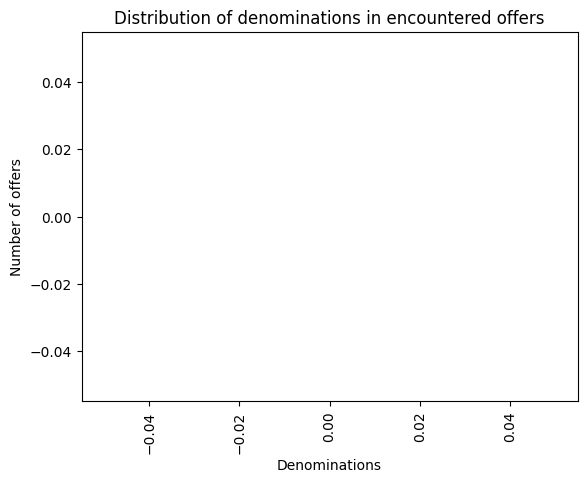

In [ ]:
# Get all the offers with "denominacion" and "titulo"
test_offers = [offer for offer in offers if 'titulo' in offer]
print("Total ofertas: ", len(offers))
print("Total ofertas encontradas: ", len(test_offers))
# print the porcentage of offers with "denominacion" and "titulo"
percentage = len(test_offers) / len(offers) * 100
print("Porcentaje: {:.2f}%".format(percentage))
with open("offers.json", 'w') as f:
    json.dump(test_offers, f, indent=4)
# Print how many offers detect in test_offers for each denominacion
obtained_denominations = {}
for offer in test_offers:
    for denomination in offer['denominacion_nivel']:
        if denomination not in obtained_denominations:
            obtained_denominations[denomination] = 0
        else:
            obtained_denominations[denomination] += 1
# Sort by values
obtained_denominations = dict(sorted(obtained_denominations.items(), key=lambda item: item[1], reverse=True))
# And plot the results, in a bar plot
plt.bar(obtained_denominations.keys(), obtained_denominations.values())
plt.title("Distribution of denominations in encountered offers")
plt.xlabel("Denominations")
plt.ylabel("Number of offers")
plt.xticks(rotation=90)
print(obtained_denominations)

# Clasified

In [ ]:
# Get the register with "denominacion_nivel"
correct = [offer for offer in test_offers if 'denominacion_nivel' in offer]
# Save the correct offers
with open("correct_offers.json", 'w') as f:
    json.dump(correct, f, indent=4)

# Errors

In [ ]:
# Get the registers without "denominacion_nivel"
errors = [offer for offer in offers if 'denominacion_nivel' not in offer]
# Save the first 100 errors as json file
with open("errors.json", 'w') as f:
    json.dump(errors[:100], f, indent=4)

# Test individual offer

In [ ]:
new_offer = """Funciones - Preparar las áreas de trabajo para el servicio. - Transportar útiles y enseres necesarios para el servicio. - Controlar y revisar mercancías y objetos de uso de la sección. - Facturación y cobro a cliente/a (si se da el caso) - Se responsabilizará de que su zona de trabajo esté en perfecto orden y limpieza, así mismo su apariencia debe de ser pulcra y esmerada. - En todo momento tendrá presentes las normas básicas de higiene y manipulación de alimentos. - Preparación del comedor (menaje). - Preparación en cafetería (si aplica) de zumos, infusiones, bebidas refrescantes, etc. y colocación y recolocación en las neveras. - Colocación de menús en bandejas, revisión y distribución. - Camarero/a Barra (tareas servicio de barra). - Limpieza de sala y barra. Se ofrece Contrato: vacaciones del 10 de septiembre al 19 de octubre. Posibilidad de continuidad posterior. Horario Dos días por semana de 8.00 a 16.00 horas. 3 días de tarde de 18.00 a 22.00 horas. Se trabaja de lunes a domingo con 2 días de libranza rotativos. Salario convenio colectividades. - Formación ESO o similar - Experiencia en funciones similares"""
new_offer_output = normalize_offer(niveles, titles, mapping_id, {'description': new_offer})
print(new_offer_output)

TypeError: normalize_offer() missing 1 required positional argument: 'offer'